In [1]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
# Load the dataset
data = pd.read_csv("modified_file.csv", encoding='latin1')
data.head()

,popularity,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,year,duration_min
0,73,0.70100,0.397,0.207,0.1160,-13.155,0.0331,171.282,0.268,1986,3.793333
1,61,0.01610,0.883,0.553,0.2280,-13.232,0.9440,91.753,0.578,1986,3.680667
2,68,0.00203,0.914,0.586,0.0992,-8.435,0.3300,116.371,0.655,1986,2.624000
3,66,0.00835,0.581,0.791,0.1420,-7.262,0.0324,123.887,0.619,1986,4.271550
4,63,0.29400,0.685,0.594,0.3580,-10.906,0.0289,121.761,0.853,1986,3.069333


In [3]:
#Convert to binary
#binary_column = pd.get_dummies(data['principle_artist_followers'])

#Write back to CSV
#df = pd.concat([data.drop('principle_artist_followers', axis=1), binary_column], axis=1)

# Optionally, write the modified DataFrame back to a CSV file
#df.to_csv('modified_file.csv', index=False)

In [4]:
# Define features set
X = data.copy()
X.drop("popularity", axis=1, inplace=True)
X.head()


,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,year,duration_min
0,0.70100,0.397,0.207,0.1160,-13.155,0.0331,171.282,0.268,1986,3.793333
1,0.01610,0.883,0.553,0.2280,-13.232,0.9440,91.753,0.578,1986,3.680667
2,0.00203,0.914,0.586,0.0992,-8.435,0.3300,116.371,0.655,1986,2.624000
3,0.00835,0.581,0.791,0.1420,-7.262,0.0324,123.887,0.619,1986,4.271550
4,0.29400,0.685,0.594,0.3580,-10.906,0.0289,121.761,0.853,1986,3.069333


In [5]:
# List of column names corresponding to features you want to use
# selected_features = ['acousticness', 'key', 'tempo', 'energy']

# Subset the DataFrame to include only the selected features
# X = data[selected_features]
# print(X)

In [6]:
# Define target vector
y = data["popularity"].values.reshape(-1, 1)
y[:5]

array([[73],
       [61],
       [68],
       [66],
       [63]], dtype=int64)

In [7]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [8]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [9]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)


In [10]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Split data into features and target variable
X = data.drop('popularity', axis=1)
y = data['popularity']


In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)


In [13]:
# Initialize Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=78)


In [14]:
# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=78)

Feature ranking:
1. Feature 8: 0.5019553757130374
2. Feature 4: 0.0606500842430947
3. Feature 9: 0.0598498544888373
4. Feature 5: 0.05751317315558409
5. Feature 1: 0.05705023367284708
6. Feature 6: 0.05618513854699671
7. Feature 3: 0.05403585560921404
8. Feature 7: 0.053426240076419815
9. Feature 0: 0.05293681841062271
10. Feature 2: 0.046397226083346205


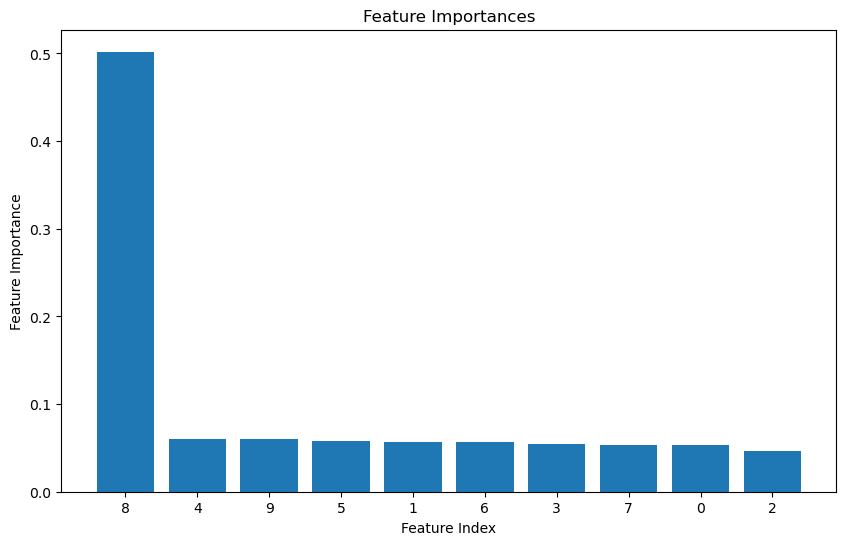

In [15]:
# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, idx in enumerate(indices):
    print(f"{i + 1}. Feature {idx}: {importances[idx]}")

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.show()

In [16]:
# Predict on the testing set
y_pred = model.predict(X_test)
y_pred

array([66.26 , 70.4  , 71.17 , ..., 79.39 , 57.015, 76.31 ])

In [17]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 43.366073026429966


In [18]:
# Create the random forest regressor instance
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)

In [19]:
X = np.random.rand(1000, 19)

y = np.random.rand(1000, 19)

if len(y) > len(X):
    y = y[:len(X)]
elif len(y) < len(X):
    
    y = np.concatenate([y, np.zeros(len(X) - len(y))])


In [20]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1000, 19)
Shape of y: (1000, 19)


In [21]:
X_train_scaled

array([[-0.72388019,  0.95243491, -1.85711615, ..., -2.04182251,
         1.25519963,  0.49680899],
       [-0.76021935,  1.99829048, -0.44565504, ...,  0.19645986,
        -0.29109541,  0.37364653],
       [ 0.08323165,  1.09477028,  0.44015848, ...,  0.6287024 ,
        -1.20068073,  1.12773174],
       ...,
       [-0.45994314,  1.71361973,  0.23573998, ...,  1.74193084,
         0.16369725,  1.30494313],
       [-0.47524384,  0.0674802 , -0.76688412, ..., -0.01966141,
        -1.56451485,  1.1036743 ],
       [ 0.52312673,  0.90292695,  0.69811517, ...,  1.13842238,
         0.34561431, -0.11372688]])

In [22]:
y_train.ravel()

array([72, 65, 52, ..., 80, 58, 60], dtype=int64)

In [23]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [24]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [25]:
#decision_path(predictions)
# Make predictions on the test set
y_pred = model.predict(X_test)

In [26]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)

In [27]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [28]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

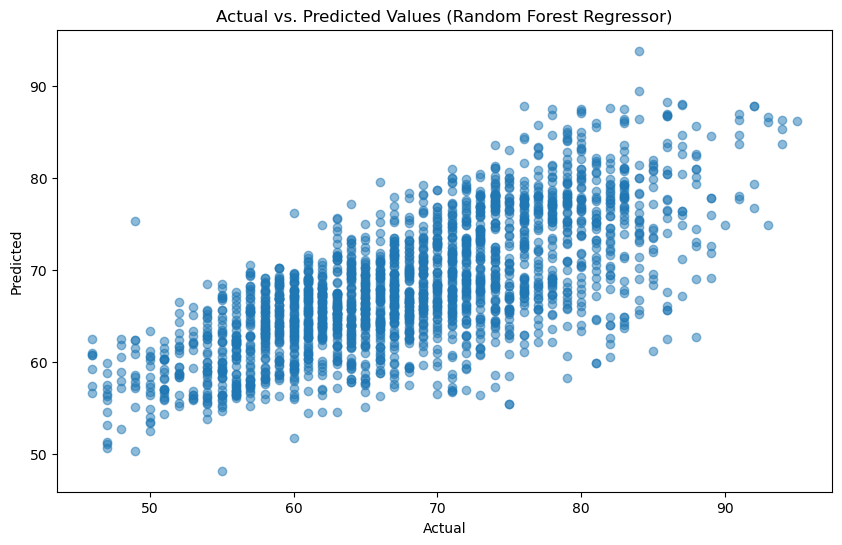

In [29]:
# Instantiate the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Random Forest Regressor)')
plt.show()

In [30]:
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Displaying results
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 43.366073026429966
R-squared Score: 0.502124013091833


In [33]:
# Your input array
input_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Reshape the input array to have two dimensions
input_array_reshaped = input_array.reshape(1, -1)

# Now you can use the predict function with the reshaped array
model.predict(input_array_reshaped)


C:\Users\marti\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([62.68])

In [36]:
test_input_data = pd.read_csv("Sample_Input.csv", encoding='latin1')
test_input_data.columns = [col.replace('ï»¿', '') for col in test_input_data.columns]

test_prediction = model.predict(test_input_data)
print(test_prediction)

[61.06]


In [37]:
from joblib import dump, load
# Save the model to a file
dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']